In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from Resnet import resnet34
from Icecube_Dataloader import IceCube_Dataloader, collate_fn

In [2]:
model = resnet34(pretrained = False)
model.fc = nn.Sequential(nn.ReLU(),nn.Linear(in_features=512, out_features=2)) # Changed FC layer for our task
model.load_state_dict(torch.load("./weights/model_34_2025-06-12_11:59:35.pth", weights_only=True))
model.eval()

ResNet(
  (conv1): Conv2d(5, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
pqfile = '/home/washindeiru/primaryDrive/iceCube/icecube-neutrinos-in-deep-ice/train_meta.parquet'
path_batch = '/home/washindeiru/primaryDrive/iceCube/icecube-neutrinos-in-deep-ice/train/'
geometry = "/home/washindeiru/primaryDrive/iceCube/icecube-neutrinos-in-deep-ice/sensor_geometry.csv"

batch_num=2
lr = 1e-06
num_epochs = 1
batch_size = 8

In [6]:
from torch.utils.data import DataLoader

ice_dataset = IceCube_Dataloader(pqfile, path_batch, geometry, batch_num)
train_dataset = ice_dataset
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,collate_fn=collate_fn, num_workers=11)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

## Testy resnet34

In [8]:
data_iter = iter(train_dataloader)

In [9]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label'].to(device)

result = model(input_tensor.to(device))

input tensor shape: torch.Size([8, 5, 1, 2311])
label shape: torch.Size([8, 2])


In [10]:
def compare(label, result):
    assert label.shape == result.shape
    x = label.shape[0]
    for i in range(x):
        print(f"Correct: {label[i, :].detach().cpu().numpy()}, predicted: {result[i, :].detach().cpu().numpy()}")

In [14]:
compare(label, result)

Correct: [5.827351  1.1743858], predicted: [1.5663016 1.1183655]
Correct: [4.217883  1.9368633], predicted: [1.443208  1.1441729]
Correct: [4.2548003 0.4101669], predicted: [1.5713267 1.1604666]
Correct: [5.9851904 1.9383175], predicted: [1.5520196 1.1047766]
Correct: [5.569147  2.0059903], predicted: [1.5186439 1.1211486]
Correct: [1.7169573 1.9825397], predicted: [1.56008   1.1262977]
Correct: [2.721782  0.8837729], predicted: [1.6365905 1.2819067]
Correct: [3.3170254 1.3807974], predicted: [1.5380961 1.1242049]


In [15]:
loss_function = nn.MSELoss().to(device)

In [16]:
temp = loss_function(result.float(),label.float())
print(temp)

tensor(4.8195, device='cuda:0', grad_fn=<MseLossBackward0>)


In [17]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label']

result = model(input_tensor.to(device))

input tensor shape: torch.Size([8, 5, 1, 97])
label shape: torch.Size([8, 2])


In [18]:
compare(label, result)

Correct: [6.213515 2.292257], predicted: [2.5607653 0.7167339]
Correct: [5.3895106 2.4848273], predicted: [2.4492393 1.1325467]
Correct: [0.92564684 2.4146242 ], predicted: [2.9049652 0.9802181]
Correct: [2.688308  0.9210144], predicted: [2.1717522 1.5918382]
Correct: [1.2283885 1.7314225], predicted: [2.5586066 1.0655453]
Correct: [5.2125897  0.77101296], predicted: [2.0582945 1.1853485]
Correct: [5.001557  0.6944043], predicted: [2.8867123 1.1604309]
Correct: [2.738024  1.5715377], predicted: [2.667045  1.1651855]


In [19]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label']

result = model(input_tensor.to(device))

input tensor shape: torch.Size([8, 5, 1, 96])
label shape: torch.Size([8, 2])


In [20]:
compare(label, result)

Correct: [1.2281085 2.780492 ], predicted: [3.0648942 1.7825099]
Correct: [0.25617284 2.3344734 ], predicted: [2.5958152 1.3649203]
Correct: [4.5376167 1.1291322], predicted: [2.4660847 1.1651592]
Correct: [1.8875905  0.18131284], predicted: [2.519852  1.1277318]
Correct: [0.8235567  0.26834896], predicted: [3.009146  1.1921018]
Correct: [1.9924    1.2991153], predicted: [2.6003735 1.025476 ]
Correct: [0.754738   0.41849214], predicted: [2.6998987 1.0098956]
Correct: [1.6845481 1.9913347], predicted: [2.854613 1.10829 ]


In [21]:
first_batch = next(data_iter)
print(f"input tensor shape: {first_batch['input_tensor'].shape}")
print(f"label shape: {first_batch['label'].shape}")
input_tensor = first_batch['input_tensor']
label = first_batch['label']

result = model(input_tensor.to(device))

input tensor shape: torch.Size([8, 5, 1, 31])
label shape: torch.Size([8, 2])


In [22]:
compare(label, result)

Correct: [5.674096  1.5192869], predicted: [3.2139235 1.5380979]
Correct: [0.5125896  0.60864615], predicted: [2.9092202 1.1130397]
Correct: [3.1197567  0.49450287], predicted: [2.736933  0.9808442]
Correct: [1.8432047 1.6670744], predicted: [2.7037296 1.0690941]
Correct: [3.3006458 0.5654834], predicted: [3.0996509 1.1782963]
Correct: [1.3590817 1.6834139], predicted: [3.037009  1.3522272]
Correct: [1.8210853 2.5311818], predicted: [2.909437  0.9875259]
Correct: [4.7780786  0.88678956], predicted: [3.089508  1.1347694]


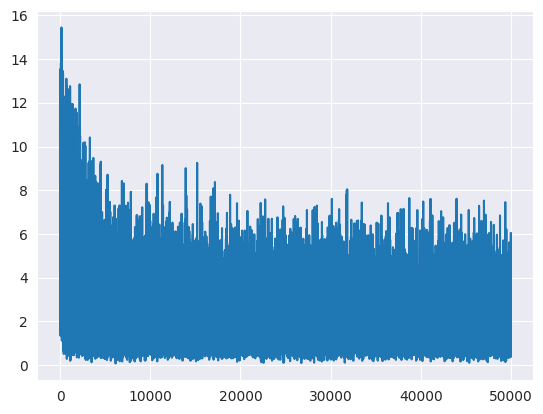

In [25]:
import pickle

with open('results/losses_2025-06-12_11:59:35.pickle', 'rb') as f:
    data = pickle.load(f)

plt.figure()
plt.plot(data)

In [24]:
import numpy as np

num_of_examples = 100
losses_ = []
loss_total = 0.

for i in range(num_of_examples):
    example = next(data_iter)
    input_tensor = first_batch['input_tensor']
    label = first_batch['label']

    result = model(input_tensor.to(device))

    loss_value = loss_function(result.float().cpu(),label.float().cpu())
    losses_.append(loss_value.item())

print(f"average loss: {np.mean(losses_)}")
print(f"Median loss: {np.median(losses_)} ")

average loss: 1.4595896005630493
Median loss: 1.4595896005630493 
